# Fintech - Part 2


In [1]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def get_yahoo_finance_data(ticker: str, start_date: str = None, end_date: str = None):
    # Create a ticker object
    stock = yf.Ticker(ticker)
    
    # Fetch historical market data
    hist = stock.history(period="max", start=start_date, end=end_date)
    
    # Return the data
    return hist

# Example usage
ticker = '^GSPC'  # Apple Inc. ticker symbol
data = get_yahoo_finance_data(ticker)

# Display the data
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-26 00:00:00-04:00,5433.669922,5488.319824,5430.700195,5459.100098,3638770000,0.0,0.0
2024-07-29 00:00:00-04:00,5476.549805,5487.740234,5444.439941,5463.540039,3379970000,0.0,0.0
2024-07-30 00:00:00-04:00,5478.729980,5489.459961,5401.700195,5436.439941,3777740000,0.0,0.0


In [3]:
tickers = {
    "S&P500": "^GSPC",
    "Crude Oil": "CL=F",
    "Silver": "SI=F", # No
    "Iron": "TIO=F",
    "NIFTY 50": "^NSEI",
    "NYSE Composite": "^NYA",
    "Candian Dollar": "CNY=X",
    "Euro": "EUR=X",
}


In [4]:
dfs = {
    name: get_yahoo_finance_data(ticker) for name, ticker in tickers.items()
}

# Convert indices to date-only format and find the intersection of all dates
common_dates = set.intersection(*(set(df.index.date) for df in dfs.values()))

# Find the earliest common date
earliest_common_date = min(common_dates)

print(f"The earliest common date is: {earliest_common_date}")

# Filter dataframes to the common date range
dfs = {name: df.loc[str(earliest_common_date):] for name, df in dfs.items()}

The earliest common date is: 2010-10-14


**Gold price data**


In [5]:
gold_df = pd.read_excel("Gold_Prices.xlsx", sheet_name="Daily", skiprows=5,usecols=[2, 3],)\
    .rename(columns={"Unnamed: 2": "Date"}).set_index("Date").loc[str(earliest_common_date):]

gold_df

,USD
Date,
2010-10-14,1373.25
2010-10-15,1367.50
2010-10-18,1367.25
2010-10-19,1339.00
2010-10-20,1339.00
...,...
2024-07-22,2392.70
2024-07-23,2403.10
2024-07-24,2421.45


In [6]:
for name, df in dfs.items():
    df.index = df.index.date
    dfs[name] = df

We decided to concentarte on the Close price between 2010-2014.

In [7]:
combined_df = pd.DataFrame(index=dfs["S&P500"].index)
rel_column = "Close"

for feature, df in dfs.items():
    combined_df[f"{feature}_{rel_column}"] = df['Close']
    # print(df['Close'])
combined_df.index = pd.DatetimeIndex(combined_df.index)

combined_df

,S&P500_Close,Crude Oil_Close,Silver_Close,Iron_Close,NIFTY 50_Close,NYSE Composite_Close,Candian Dollar_Close,Euro_Close
2010-10-14,1173.810059,82.690002,24.417000,148.789993,6177.350098,7546.589844,6.6560,0.71596
2010-10-15,1176.189941,81.250000,24.271999,146.000000,6062.649902,7520.600098,6.6434,0.71063
2010-10-18,1184.709961,83.080002,24.396999,143.070007,6075.950195,7571.100098,6.6310,0.71611
2010-10-19,1165.900024,79.489998,23.764000,140.919998,6027.299805,7423.649902,6.6342,0.71757
2010-10-20,1178.170044,81.769997,23.848000,142.880005,5982.100098,7523.810059,6.6346,0.72785
...,...,...,...,...,...,...,...,...
2024-07-29,5463.540039,75.809998,27.702999,106.589996,24836.099609,18539.369141,7.2501,0.92134
2024-07-30,5436.439941,74.730003,28.365000,106.250000,24857.300781,18580.580078,7.2583,0.92426
2024-07-31,5522.299805,77.910004,28.778000,105.940002,24951.150391,18710.009766,7.2507,0.92455
2024-08-01,5446.680176,76.309998,28.330999,102.830002,25010.900391,18493.230469,7.2172,0.92388


We drop rows with NaN values to ensure the data is clean for statistical calculations.

In [8]:
combined_df["gold_price"] = gold_df["USD"]
combined_df.dropna()

,S&P500_Close,Crude Oil_Close,Silver_Close,Iron_Close,NIFTY 50_Close,NYSE Composite_Close,Candian Dollar_Close,Euro_Close,gold_price
2010-10-14,1173.810059,82.690002,24.417000,148.789993,6177.350098,7546.589844,6.6560,0.71596,1373.25
2010-10-15,1176.189941,81.250000,24.271999,146.000000,6062.649902,7520.600098,6.6434,0.71063,1367.50
2010-10-18,1184.709961,83.080002,24.396999,143.070007,6075.950195,7571.100098,6.6310,0.71611,1367.25
2010-10-19,1165.900024,79.489998,23.764000,140.919998,6027.299805,7423.649902,6.6342,0.71757,1339.00
2010-10-20,1178.170044,81.769997,23.848000,142.880005,5982.100098,7523.810059,6.6346,0.72785,1339.00
...,...,...,...,...,...,...,...,...,...
2024-07-22,5564.410156,79.779999,29.124001,108.160004,24509.250000,18539.140625,7.2690,0.91750,2392.70
2024-07-23,5555.740234,76.959999,29.132000,107.790001,24479.050781,18518.339844,7.2727,0.91829,2403.10
2024-07-24,5427.129883,77.589996,29.115999,107.470001,24413.500000,18308.419922,7.2743,0.92160,2421.45
2024-07-25,5399.220215,78.279999,27.806999,107.139999,24406.099609,18344.460938,7.2612,0.92255,2364.20


# The Correlation Matrix of our features' prices

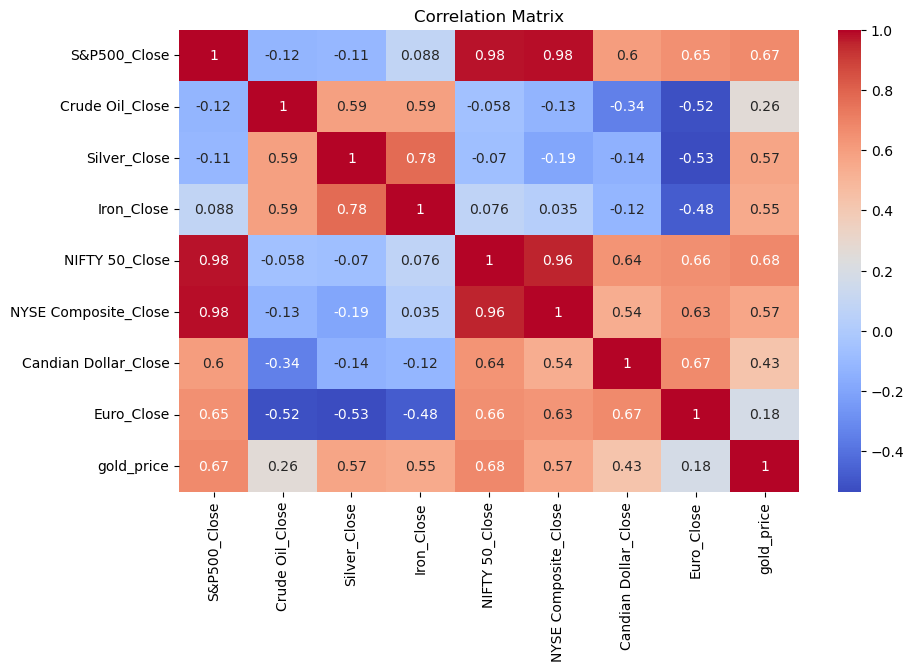

In [9]:
correlation_matrix = combined_df.corr()

# Plotting the Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Mean and Standard deviation

In [10]:
combined_stats = combined_df.describe().loc[['mean', 'std']]
combined_stats

,S&P500_Close,Crude Oil_Close,Silver_Close,Iron_Close,NIFTY 50_Close,NYSE Composite_Close,Candian Dollar_Close,Euro_Close,gold_price
mean,2728.380086,71.688715,21.972074,107.443326,10873.970231,12060.403575,6.597478,0.850292,1531.883506
std,1145.975021,22.187108,6.352372,38.849430,4963.895826,2942.117878,0.343205,0.076995,302.158241


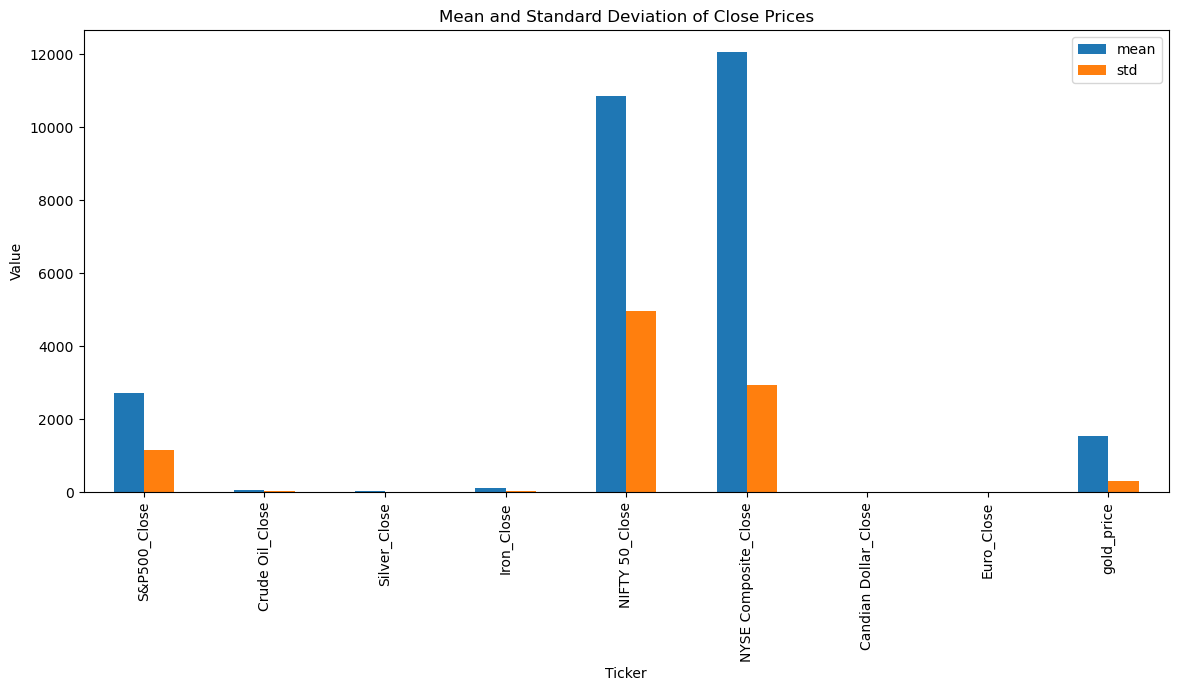

In [11]:
combined_stats.T.plot(kind='bar', figsize=(14, 6), title='Mean and Standard Deviation of Close Prices')
plt.xlabel('Ticker')
plt.ylabel('Value')
plt.show()

# Detect outliers using IQR method
We identify outliers as data points where 'Close' prices are below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.

In [12]:
def detect_outliers_iqr(df):
    outliers_dict = {}
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers_dict[column] = outliers
    return outliers_dict

outliers_dict = detect_outliers_iqr(combined_df)
for column, outliers in outliers_dict.items():
    print(f"\nOutliers for {column} using IQR method:")
    print(outliers)


Outliers for S&P500_Close using IQR method:
Empty DataFrame
Columns: [S&P500_Close, Crude Oil_Close, Silver_Close, Iron_Close, NIFTY 50_Close, NYSE Composite_Close, Candian Dollar_Close, Euro_Close, gold_price]
Index: []

Outliers for Crude Oil_Close using IQR method:
            S&P500_Close  Crude Oil_Close  Silver_Close  Iron_Close  \
2020-04-20   2823.159912       -37.630001        15.556       84.43   

            NIFTY 50_Close  NYSE Composite_Close  Candian Dollar_Close  \
2020-04-20     9261.849609          11003.879883                7.0722   

            Euro_Close  gold_price  
2020-04-20     0.92022      1686.2  

Outliers for Silver_Close using IQR method:
            S&P500_Close  Crude Oil_Close  Silver_Close  Iron_Close  \
2011-04-05   1332.630005       108.339996     39.174999  173.179993   
2011-04-06   1335.540039       108.830002     39.383999  175.000000   
2011-04-07   1333.510010       110.300003     39.542000  179.309998   
2011-04-08   1328.170044       112.

**We can see that :**

1. S&P 500 (S&P500_Close) : 
    No outliers detected.
    

2. Oil (Crude Oil_Close):

    Outlier detected on 2020-04-20 with a negative price of -37.63 USD. This date is significant as it reflects the     unprecedented event when oil prices turned negative due to oversupply and storage issues during the COVID-19       pandemic.
    
    
3. Silver (Silver_Close):

    Outliers detected mostly between April 2011 and September 2011. This period saw a significant rise in silver       prices, peaking around April 2011, which was followed by high volatility.
    
    
4. Iron (Iron_Close):
    No outliers detected.
    
    
5. NIFTY 50 (NIFTY 50_Close):
    No outliers detected.
    
    
6. NYSE Composite (NYSE Composite_Close):
    No outliers detected.


7. Canadian Dollar (Candian Dollar_Close):
    No outliers detected.


8. Euro (Euro_Close):
    No outliers detected.


9. Gold (gold_price): 
    No outliers detected.